# Final Project Ideas 2

In this notebook we will introduce a new data set from the Economic Census.
The Economic Census is conducted once every five years.
The most recent one was conducted in 2022. 

We will demonstrates some basic analysis of census data from the
Economic Census, then propose a number of directions you can go
to use what you have learned in today's lessons in your final project.

## Background: Economic Census Data



In [1]:
import censusdis.data as ced
from censusdis.datasets import ECN_BASIC

import censusdis.states as states

from matplotlib.ticker import FuncFormatter
import pandas as pd

pd.set_option("max_colwidth", 500)

### About the ECN_BASIC Data Set

The data from the Economic Census is published in several data sets. 
We will be using one called the ECN Basic data set. Here is a summary of the ECN_BASIC data set. 

In [2]:
ced.variables.search_data_sets(vintage=2022, pattern="ECN_BASIC")

,YEAR,SYMBOL,DATASET,TITLE,DESCRIPTION,API BASE URL
0,2022,ECN_BASIC,ecnbasic,"Economic Census: Core Statistics: Summary Statistics for the U.S., States, and Selected Geographies: 2022","This dataset provides industry statistics on number of firms; number of establishments; number of employees; payroll; and sales, value of shipments, or revenue by geographic area for establishments and firms with paid employees. Data are shown on a 2022 NAICS basis. The statistics, NAICS levels, and the geographic areas covered vary by sector.",http://api.census.gov/data/2022/ecnbasic


In [3]:
ced.geographies(ECN_BASIC, 2022)

[['us']]

### ECN_BASIC Variables of Interest

In the interests of time and space we won't do a full exploration of the variables in this data set, But here is a summary of the variables we will be looking at.

In [4]:
ced.variables.search(
    dataset=ECN_BASIC, vintage=2022, pattern=r"NAICS2022|^EMP$|PAYANN$|RCPTOT$"
)[["VARIABLE", "LABEL"]]

,VARIABLE,LABEL
0,EMP,Number of employees
1,NAICS2022,2022 NAICS code
2,PAYANN,"Annual payroll ($1,000)"
3,RCPTOT,"Sales, value of shipments, or revenue ($1,000)"


### Download Data for the Entire Country

In [5]:
df_2022 = ced.download(
    ECN_BASIC,
    2022,
    ["NAICS2022_LABEL", "NAME", "EMP", "PAYANN", "RCPTOT"],
    us="*",
    query_filter={"NAICS2022": "*", "INDLEVEL": 2},
)

In [6]:
df_2022

,NAICS2022,INDLEVEL,US,NAICS2022_LABEL,NAME,EMP,PAYANN,RCPTOT
0,21,2,1,"Mining, quarrying, and oil and gas extraction",United States,565193,51603653,596820782
1,22,2,1,Utilities,United States,676197,75528772,744750176
2,23,2,1,Construction,United States,7606446,529774998,2924168694
3,31-33,2,1,Manufacturing,United States,12260726,814733642,7061077444
4,42,2,1,Wholesale trade,United States,6246888,514261571,11643585918
5,44-45,2,1,Retail trade,United States,17140339,614538095,6968618330
6,48-49,2,1,Transportation and warehousing,United States,6311223,351921997,1366617631
7,51,2,1,Information,United States,4541773,521344756,2220088293
8,52,2,1,Finance and insurance,United States,7477859,825258918,5677370670
9,53,2,1,Real estate and rental and leasing,United States,2630095,160503356,960126632


### Compute Payroll per Employee

In [7]:
df_2022["PAYANN_PER_EMP"] = df_2022["PAYANN"] / df_2022["EMP"]

In [8]:
df_2022

,NAICS2022,INDLEVEL,US,NAICS2022_LABEL,NAME,EMP,PAYANN,RCPTOT,PAYANN_PER_EMP
0,21,2,1,"Mining, quarrying, and oil and gas extraction",United States,565193,51603653,596820782,91.302711
1,22,2,1,Utilities,United States,676197,75528772,744750176,111.696402
2,23,2,1,Construction,United States,7606446,529774998,2924168694,69.648164
3,31-33,2,1,Manufacturing,United States,12260726,814733642,7061077444,66.450685
4,42,2,1,Wholesale trade,United States,6246888,514261571,11643585918,82.322842
5,44-45,2,1,Retail trade,United States,17140339,614538095,6968618330,35.853322
6,48-49,2,1,Transportation and warehousing,United States,6311223,351921997,1366617631,55.761300
7,51,2,1,Information,United States,4541773,521344756,2220088293,114.788818
8,52,2,1,Finance and insurance,United States,7477859,825258918,5677370670,110.360321
9,53,2,1,Real estate and rental and leasing,United States,2630095,160503356,960126632,61.025688


### Plot Employees and Pay per Employee

In [9]:
# Some styling to make the plots look good.
millions_formatter = FuncFormatter(lambda x, pos: f"{x // 1_000_000:.0f}")
thousand_dollar_formatter = FuncFormatter(lambda x, pos: f"${int(x*1_000):,d}")
sector_formatter = FuncFormatter(lambda x, pos: textwrap.fill(pos, 20))

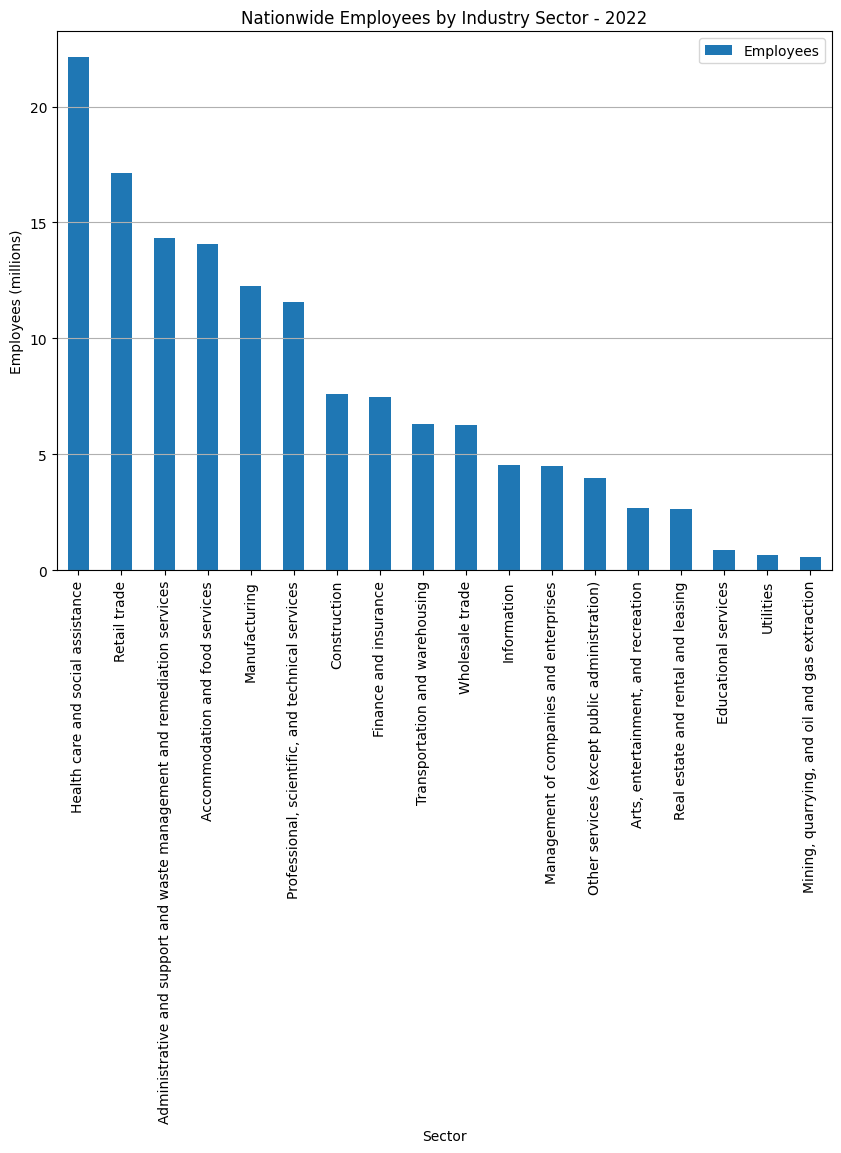

In [10]:
ax = df_2022.sort_values("EMP", ascending=False).plot.bar(
    "NAICS2022_LABEL",
    "EMP",
    label="Employees",
    title="Nationwide Employees by Industry Sector - 2022",
    figsize=(10, 7),
)

ax.set_xlabel("Sector")

ax.yaxis.set_major_formatter(millions_formatter)
ax.set_ylabel("Employees (millions)")

ax.grid(axis="y")

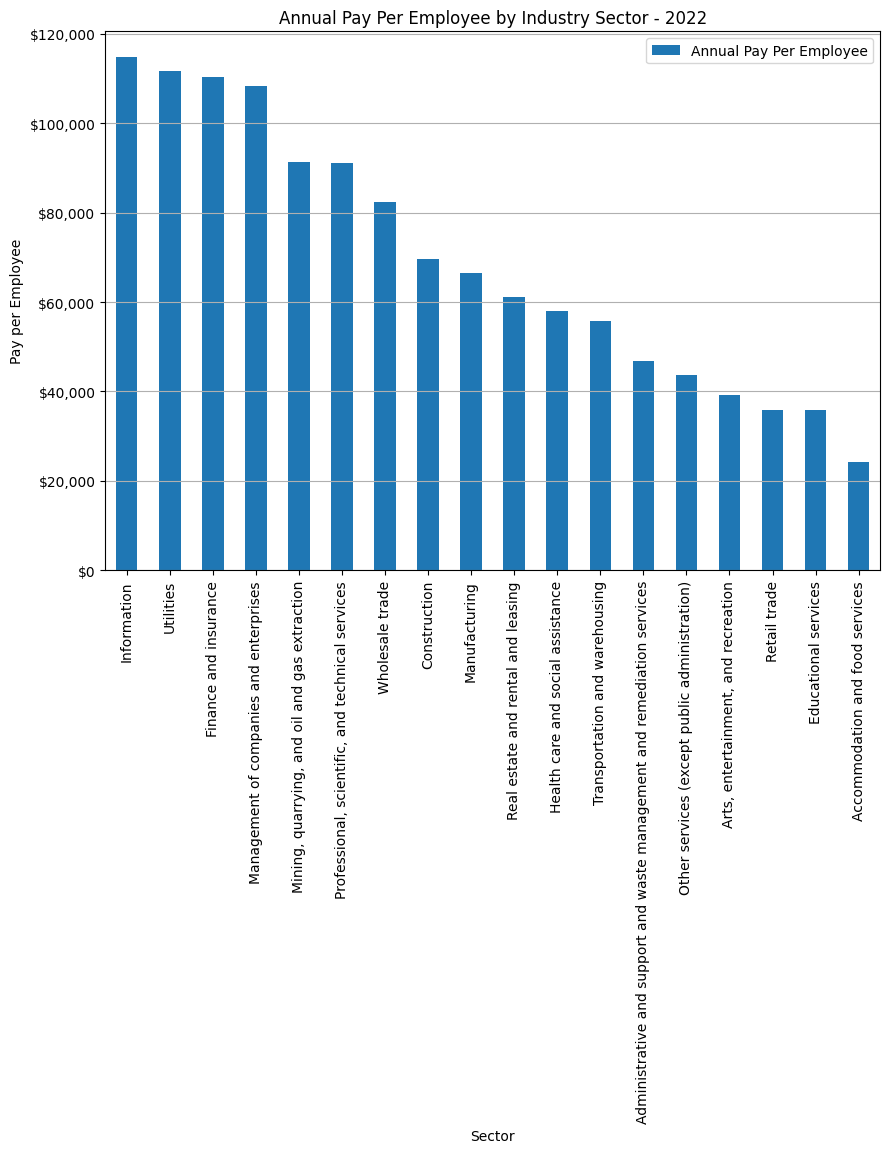

In [11]:
ax = df_2022.sort_values("PAYANN_PER_EMP", ascending=False).plot.bar(
    "NAICS2022_LABEL",
    "PAYANN_PER_EMP",
    label="Annual Pay Per Employee",
    title="Annual Pay Per Employee by Industry Sector - 2022",
    figsize=(10, 7),
)

ax.set_xlabel("Sector")

ax.yaxis.set_major_formatter(thousand_dollar_formatter)
ax.set_ylabel("Pay per Employee")

ax.grid(axis="y")

## Project Ideas

This project is deliberately open-ended.
Based on what you saw above and what you learned in the lessons, there
are several different questions you can tackle. It is ok if you just
concentrate on one of them. They can also be done in any order.

1. Choose one of the top level sectors (two digit NAICS codes) and drill down
   further in the tree of NAICS code.
   - Plot the number of employees in each leaf-level code under either your
     chosen two digit code or an interesting three or four digit code below
     it.
   - Plot the average pay per employee of the leaf-level codes you chose.
2. As of now, the 2022 `ECN_BASIC` data has only been published at the national
   level. But data from the previous survey in 2017 exists at other geographies too.
   Try `ced.geographies(ECN_BASIC, 2017)` to see them.
   Using the 2017 data instead of the 2022 data, choose one of the top level
   sectors (two digit NAICS codes) and get data for just that sector, but at the
   state level instead of the national level.
   - Plot the number of employees in that sector by state on a map.
   - Plot the average pay per employee in that sector on a map.
   - Make a table of the top 10 states by number of employees in the sector
     and another for where employees are paid the most on average.
   - Pick the place you are from (if you live in the U.S.) or just a favorite
     place and determine what sectors employ the most people in that place.
3. Determine how much employment in each sector changed from 2017 to 2022.
   - First compute the change in the total number of employees in each sector
     nationwide.
   - Note that this will require some fluency in Pandas. In particular, you
     will probably need to use the `pd.DataFrame.merge` method to merge the data
     from the two different year.
   - Second, compute the change is earnings per employee. Is there any pattern
     or relationship you can see between how salaries changed and how employment
     changed?